Creating our own model

In [2]:
from gensim.models import FastText #instead of this version, find a version without wrapper.
model_dan=FastText.load_fasttext_format('cc.da.300.bin')

C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  


In [3]:
print(model_dan.wv.similarity("tak", "Velkommen"))
print(model_dan.wv.most_similar("tak"))

0.2325377
[('takker', 0.6787657737731934), ('takke', 0.6613830327987671), ('TAK', 0.6562446355819702), ('tak.', 0.6307595372200012), ('tak.Og', 0.6274226903915405), ('TUSIND', 0.6098675727844238), ('Tusind', 0.5937371253967285), ('hjælpen.', 0.5825209617614746), ('tak.-', 0.576162576675415), ('tak.Mvh.', 0.570332407951355)]


In [4]:
print(model_dan.wv.doesnt_match('stol bord reol græs'.split(" ")))

græs


C:\Users\han\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np

In [6]:
dans = pd.read_excel("dan_dataset.xlsx", encoding= 'cp865')
display(HTML(dans.to_html()))

,word1,word2,word3,word4
0,æble,pære,kirsebær,stol
1,stol,bord,reol,græs
2,græs,træ,blomst,bil
3,bil,cykel,tog,vind
4,vind,regn,solskin,mandag
5,mandag,tirsdag,søndag,tømrer
6,tømrer,vvs-mand,snedker,barn
7,barn,far,mormor,lampe
8,lampe,stearinlys,lommelygte,jern
9,jern,guld,magnesium,sjov


In [9]:
total = 0
correct = 0
predict = 0
for index, row in dans.iterrows():
    predict = model_dan.wv.doesnt_match(row.values)
    total += 1
    if predict == row["word4"]:
        correct += 1
    else:
        print(row.values, predict)
prediction_accuracy = correct/total
print(prediction_accuracy)

['bil' 'cykel' 'tog' 'vind'] tog
['Lars Løkke Rasmussen' 'Poul Nyrup Rasmussen' 'Anders Fogh Rasmussen'
 'Peter Schmeichel'] Anders Fogh Rasmussen
['Caroline Wozniacki' 'Steffi Graf' 'Serena Williams' 'Monaco'] Serena Williams
['Pia' 'Lone' 'Marianne' 'Ole'] Pia
['ishockey' 'skiløb' 'skihop' 'fodbold'] skihop
['gå' 'løbe' 'kravle' 'sidde'] gå
['Kattegat' 'Øresund' 'Alssund' 'Sjælland'] Alssund
['hoppende' 'dansende' 'løbende' 'døende'] løbende
['gange' 'dividere' 'lægge sammen' 'vandrer'] lægge sammen
['mener' 'tror' 'ved' 'går'] ved
['fire minutter' 'tre timer' 'en uge' 'to piger'] tre timer
['anmeldelse' 'politi' 'forbrydelse' 'kaffe'] anmeldelse
[1864 1807 1940 1909] 1807
['dør' 'kradser af' 'udånder' 'åbner'] kradser af
['og' 'samt' 'endvidere' 'sin'] og
['stod og råbte' 'lå og sov' 'sad og så' 'mand og kvinde'] stod og råbte
0.84


### English model

In [2]:
engs = pd.read_csv("eng_dataset2.csv", encoding= 'utf-8')
display(HTML(engs.to_html()))

,word1,word2,word3,word4
0,train,car,plane,exercise
1,brother,sister,father,iron
2,stool,chair,couch,door
3,tree,grass,bush,clock
4,poster,photo,picture,camera
5,weight,height,length,meter
6,worm,earthworm,cockroach,tiger
7,cereals,milk,butter,knife
8,lunch,dinner,breakfast,kitchen
9,basketball,baseball,football,strategy


In [3]:
from gensim.models import FastText
model = FastText.load_fasttext_format('cc.en.300.bin')

C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  


In [4]:
print(model.wv.most_similar('teacher'))
# Output = [('headteacher', 0.8075869083404541), ('schoolteacher', 0.7955552339553833), ('teachers', 0.733420729637146), ('teaches', 0.6839243173599243), ('meacher', 0.6825737357139587), ('teach', 0.6285147070884705), ('taught', 0.6244685649871826), ('teaching', 0.6199781894683838), ('schoolmaster', 0.6037642955780029), ('lessons', 0.5812176465988159)]
print(model.wv.similarity('teacher', 'teaches'))

[('teachers', 0.754426121711731), ('teacher.The', 0.7518177628517151), ('teacher-', 0.7434277534484863), ('teacher.But', 0.7367769479751587), ('teacher.He', 0.7327342629432678), ('teacher.She', 0.7304024696350098), ('educator', 0.7279404997825623), ('teacher.This', 0.7241754531860352), ('teacher.A', 0.7125754356384277), ('teacher.So', 0.7104302644729614)]
0.39747044


In [5]:
print(model.wv.doesnt_match('pause halt freeze shirt'.split(" ")))

shirt


C:\Users\han\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [6]:
total = 0
correct = 0
predict = 0
for index, row in engs.iterrows():
    predict = model.wv.doesnt_match(row.values)
    total += 1
    if predict == row["word4"]:
        correct += 1
    else:
        print(row.values, predict)
prediction_accuracy = correct/total
print(prediction_accuracy)

['poster' 'photo' 'picture' 'camera'] poster
['book' 'notebook' 'sheet' 'stapler'] book
['data' 'computer' 'process' 'room'] process
['bend' 'curve' 'bow' 'arrow'] curve
['straight' 'right' 'left' 'went'] straight
0.9375


### Knowledge Graphs

In [4]:
import pandas as pd
import numpy as np
import json
from SPARQLWrapper import SPARQLWrapper, JSON
from IPython.display import display, HTML
from gensim.models import FastText

In [5]:
def get_sparql_dataframe(service, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    sparql = SPARQLWrapper(service)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

In [7]:
endpoint = "https://query.wikidata.org/sparql"
sparql = """
SELECT ?lexeme ?representation {{
   ?lexeme ontolex:lexicalForm / ontolex:representation "WORD"@en ;
           ontolex:lexicalForm / ontolex:representation ?representation .
}}
"""
df = get_sparql_dataframe(endpoint, sparql)
df.head(None)

,lexeme,representation


In [10]:
sparql

'\nSELECT ?lexeme ?representation {{\n   ?lexeme ontolex:lexicalForm / ontolex:representation "WORD"@en ;\n           ontolex:lexicalForm / ontolex:representation ?representation .\n}}\n'

In [11]:
engs = pd.read_csv("eng_dataset2.csv", encoding= 'utf-8')
display(HTML(engs.to_html()))

,word1,word2,word3,word4
0,train,car,plane,exercise
1,brother,sister,father,iron
2,stool,chair,couch,door
3,tree,grass,bush,clock
4,poster,photo,picture,camera
5,weight,height,length,meter
6,worm,earthworm,cockroach,tiger
7,cereals,milk,butter,knife
8,lunch,dinner,breakfast,kitchen
9,basketball,baseball,football,strategy


In [244]:
# List Data structure
lexi = []
for index, row in engs.iterrows():
    for word in row.values:
        sparql = sparql.replace("WORD", word)
        lex = list(get_sparql_dataframe(endpoint, sparql).representation.unique())
        index = 0
        while(index < len(lex)):
            if lex[index] not in model.wv.vocab:
                del lex[index]
                index -= 1
            index += 1
        if word not in lex:
            lex.append(word)
        else:
            pass
        lexi.append(lex)
        sparql = """
        SELECT ?lexeme ?representation {{
           ?lexeme ontolex:lexicalForm / ontolex:representation "WORD"@en ;
                   ontolex:lexicalForm / ontolex:representation ?representation .
        }}
        """

In [245]:
lexi

[['train', 'trains', 'trained', 'training'],
 ['car', 'cars'],
 ['plane', 'planes', 'planed', 'planing', 'planer'],
 ['exercise', 'exercises', 'exercised', 'exercising'],
 ['brother', 'brothers', 'bretheren'],
 ['sister', 'sisters'],
 ['father', 'fathers', 'fathered', 'fathering'],
 ['iron', 'irons', 'ironed', 'ironing'],
 ['stool'],
 ['chair', 'chairs', 'chaired', 'chairing'],
 ['couch', 'couches', 'couched', 'couching'],
 ['door', 'doors'],
 ['tree', 'trees', 'treed', 'treeing'],
 ['grass', 'grasses'],
 ['bush', 'bushes'],
 ['clock', 'clocks', 'clocked', 'clocking'],
 ['poster', 'posters'],
 ['photo', 'photos'],
 ['picture', 'pictures', 'pictured', 'picturing'],
 ['camera', 'cameras'],
 ['weight', 'weights', 'weighted', 'weighting'],
 ['height', 'heights'],
 ['length', 'lengths'],
 ['meter', 'meters', 'metered', 'metering', 'metre', 'metres'],
 ['worm', 'worms', 'wormed', 'worming'],
 ['earthworm', 'earthworms'],
 ['cockroach', 'cockroaches'],
 ['tiger', 'tigers'],
 ['cereal', 'cerea

In [9]:
import pickle

In [247]:
with open("list_lex.txt", "wb") as fp:   #Pickling
    pickle.dump(lexi, fp)

In [10]:
# Read it from disk
with open("list_lex.txt", "rb") as fp:   # Unpickling
    lexi = pickle.load(fp)

In [11]:
lexi

[['train', 'trains', 'trained', 'training'],
 ['car', 'cars'],
 ['plane', 'planes', 'planed', 'planing', 'planer'],
 ['exercise', 'exercises', 'exercised', 'exercising'],
 ['brother', 'brothers', 'bretheren'],
 ['sister', 'sisters'],
 ['father', 'fathers', 'fathered', 'fathering'],
 ['iron', 'irons', 'ironed', 'ironing'],
 ['stool'],
 ['chair', 'chairs', 'chaired', 'chairing'],
 ['couch', 'couches', 'couched', 'couching'],
 ['door', 'doors'],
 ['tree', 'trees', 'treed', 'treeing'],
 ['grass', 'grasses'],
 ['bush', 'bushes'],
 ['clock', 'clocks', 'clocked', 'clocking'],
 ['poster', 'posters'],
 ['photo', 'photos'],
 ['picture', 'pictures', 'pictured', 'picturing'],
 ['camera', 'cameras'],
 ['weight', 'weights', 'weighted', 'weighting'],
 ['height', 'heights'],
 ['length', 'lengths'],
 ['meter', 'meters', 'metered', 'metering', 'metre', 'metres'],
 ['worm', 'worms', 'wormed', 'worming'],
 ['earthworm', 'earthworms'],
 ['cockroach', 'cockroaches'],
 ['tiger', 'tigers'],
 ['cereal', 'cerea

In [264]:
lexi_dic = {}
for index, row in engs.iterrows():
    for word in row.values:
        sparql = sparql.replace("WORD", word)
        if word in lexi_dic.keys():
            pass
        else:
            lexi_dic[word] = list(get_sparql_dataframe(endpoint, sparql).representation.unique())
            if bool(lexi_dic[word]) == False:
                lexi_dic[word] = [word]
            index = 0
            while(index < len(lexi_dic[word])):
                if lexi_dic[word][index] not in model.wv.vocab:
                    del lexi_dic[word][index]
                    index -= 1
                index += 1
            
        sparql = """
        SELECT ?lexeme ?representation {{
           ?lexeme ontolex:lexicalForm / ontolex:representation "WORD"@en ;
                   ontolex:lexicalForm / ontolex:representation ?representation .
        }}
        """

In [265]:
lexi_dic

{'train': ['train', 'trains', 'trained', 'training'],
 'car': ['car', 'cars'],
 'plane': ['plane', 'planes', 'planed', 'planing', 'planer'],
 'exercise': ['exercise', 'exercises', 'exercised', 'exercising'],
 'brother': ['brother', 'brothers', 'bretheren'],
 'sister': ['sister', 'sisters'],
 'father': ['father', 'fathers', 'fathered', 'fathering'],
 'iron': ['iron', 'irons', 'ironed', 'ironing'],
 'stool': ['stool'],
 'chair': ['chair', 'chairs', 'chaired', 'chairing'],
 'couch': ['couch', 'couches', 'couched', 'couching'],
 'door': ['door', 'doors'],
 'tree': ['tree', 'trees', 'treed', 'treeing'],
 'grass': ['grass', 'grasses'],
 'bush': ['bush', 'bushes'],
 'clock': ['clock', 'clocks', 'clocked', 'clocking'],
 'poster': ['poster', 'posters'],
 'photo': ['photo', 'photos'],
 'picture': ['picture', 'pictures', 'pictured', 'picturing'],
 'camera': ['camera', 'cameras'],
 'weight': ['weight', 'weights', 'weighted', 'weighting'],
 'height': ['height', 'heights'],
 'length': ['length', 'le

In [266]:
with open("dict_lex.txt", "wb") as fp:   #Pickling
    pickle.dump(lexi_dic, fp)

In [12]:
# Read it from disk

with open("dict_lex.txt", "rb") as fp:   # Unpickling
    lexi_dic = pickle.load(fp)

In [13]:
lexi_dic

{'train': ['train', 'trains', 'trained', 'training'],
 'car': ['car', 'cars'],
 'plane': ['plane', 'planes', 'planed', 'planing', 'planer'],
 'exercise': ['exercise', 'exercises', 'exercised', 'exercising'],
 'brother': ['brother', 'brothers', 'bretheren'],
 'sister': ['sister', 'sisters'],
 'father': ['father', 'fathers', 'fathered', 'fathering'],
 'iron': ['iron', 'irons', 'ironed', 'ironing'],
 'stool': ['stool'],
 'chair': ['chair', 'chairs', 'chaired', 'chairing'],
 'couch': ['couch', 'couches', 'couched', 'couching'],
 'door': ['door', 'doors'],
 'tree': ['tree', 'trees', 'treed', 'treeing'],
 'grass': ['grass', 'grasses'],
 'bush': ['bush', 'bushes'],
 'clock': ['clock', 'clocks', 'clocked', 'clocking'],
 'poster': ['poster', 'posters'],
 'photo': ['photo', 'photos'],
 'picture': ['picture', 'pictures', 'pictured', 'picturing'],
 'camera': ['camera', 'cameras'],
 'weight': ['weight', 'weights', 'weighted', 'weighting'],
 'height': ['height', 'heights'],
 'length': ['length', 'le

In [269]:
lexi[0]

['train', 'trains', 'trained', 'training']

In [270]:
model[lexi[0]]

C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ 0.01335806, -0.00963157,  0.03965454, ...,  0.07919838,
        -0.00055836, -0.0662052 ],
       [-0.00253134,  0.01508703,  0.01517177, ...,  0.05169091,
        -0.00538796, -0.01359428],
       [-0.01918122, -0.03465904,  0.01602776, ...,  0.01641077,
         0.00442993,  0.02570257],
       [-0.00498601,  0.03099985,  0.01820157, ...,  0.04192511,
         0.01714599, -0.01442314]], dtype=float32)

In [271]:
model[lexi[0]].shape

C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(4, 300)

In [272]:
model.wv.get_vector(lexi[0][0])

array([ 0.01335806, -0.00963157,  0.03965454,  0.09180262, -0.0331926 ,
        0.08483929,  0.02431522,  0.11968493, -0.03047159,  0.03519484,
       -0.05092164, -0.08361745,  0.11178705,  0.00459423, -0.04539838,
        0.04538921, -0.01614951, -0.04424891, -0.06453691,  0.05003573,
       -0.04184186,  0.02385198,  0.02200905, -0.04567365, -0.02363077,
       -0.00429634, -0.03335963, -0.06826761,  0.09015382,  0.12594485,
       -0.00410175,  0.06496722, -0.06773715, -0.05794243, -0.10057162,
        0.09784637, -0.04982875,  0.05412917,  0.07086789, -0.03909565,
        0.09275963, -0.03988485,  0.0238022 ,  0.0008159 , -0.07310851,
        0.03018969,  0.10965546,  0.05243463, -0.02951758, -0.01182625,
       -0.07442603,  0.01813956, -0.02006794,  0.01225487, -0.05043595,
       -0.01680496,  0.00351408,  0.05478802, -0.06699947, -0.04158157,
        0.04288917, -0.09914285,  0.02928351,  0.00958564, -0.00819166,
       -0.14485727, -0.08048556,  0.02208955,  0.00488378,  0.09

In [273]:
model.wv.word_vec(lexi[0][0])

array([ 0.01335806, -0.00963157,  0.03965454,  0.09180262, -0.0331926 ,
        0.08483929,  0.02431522,  0.11968493, -0.03047159,  0.03519484,
       -0.05092164, -0.08361745,  0.11178705,  0.00459423, -0.04539838,
        0.04538921, -0.01614951, -0.04424891, -0.06453691,  0.05003573,
       -0.04184186,  0.02385198,  0.02200905, -0.04567365, -0.02363077,
       -0.00429634, -0.03335963, -0.06826761,  0.09015382,  0.12594485,
       -0.00410175,  0.06496722, -0.06773715, -0.05794243, -0.10057162,
        0.09784637, -0.04982875,  0.05412917,  0.07086789, -0.03909565,
        0.09275963, -0.03988485,  0.0238022 ,  0.0008159 , -0.07310851,
        0.03018969,  0.10965546,  0.05243463, -0.02951758, -0.01182625,
       -0.07442603,  0.01813956, -0.02006794,  0.01225487, -0.05043595,
       -0.01680496,  0.00351408,  0.05478802, -0.06699947, -0.04158157,
        0.04288917, -0.09914285,  0.02928351,  0.00958564, -0.00819166,
       -0.14485727, -0.08048556,  0.02208955,  0.00488378,  0.09

In [274]:
model.wv.word_vec(lexi[0][0]) == model.wv.get_vector(lexi[0][0])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [14]:
sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president = 'The president greets the press in Chicago'.lower().split()

In [15]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
sentence_obama = [w for w in sentence_obama if w not in stopwords]
sentence_president = [w for w in sentence_president if w not in stopwords]

In [277]:
print(sentence_obama)

['obama', 'speaks', 'media', 'illinois']


In [278]:
print(sentence_president)

['president', 'greets', 'press', 'chicago']


In [100]:
model.wv.wmdistance(lexi[0][0], lexi[0][1])

0.7330935981635585

In [99]:
distance = model.wv.wmdistance(sentence_obama, sentence_president)
print(distance)

0.9925199205029905


In [19]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

"""
t-Distributed Stochastic Neighbor Embedding
The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and 
in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. 
"""

'\nt-Distributed Stochastic Neighbor Embedding\nThe t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and \nin the low dimensional space. It then tries to optimize these two similarity measures using a cost function. \n'

In [20]:
def reduce_dimensions(lexi):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for ls in lexi:
        for word in ls:
            vectors.append(model.wv[word])
            labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [21]:
x_vals, y_vals, labels = reduce_dimensions(lexi)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')
        
        


In [22]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(18, 18))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)


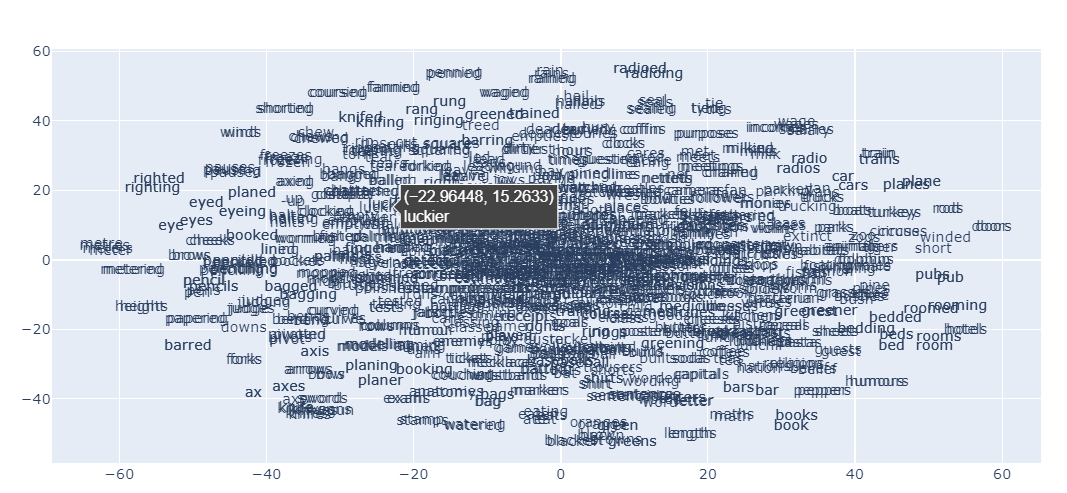

In [102]:
from IPython.display import Image
image1 = Image(filename='image1.png')
display(image1)

In [23]:
def reduce_dimensions_norm(lexi):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for ls in lexi:
        for word in ls:
            vectors.append(model.wv[word]/np.linalg.norm(model.wv[word]))
            labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [24]:
x_vals, y_vals, labels = reduce_dimensions_norm(lexi)

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

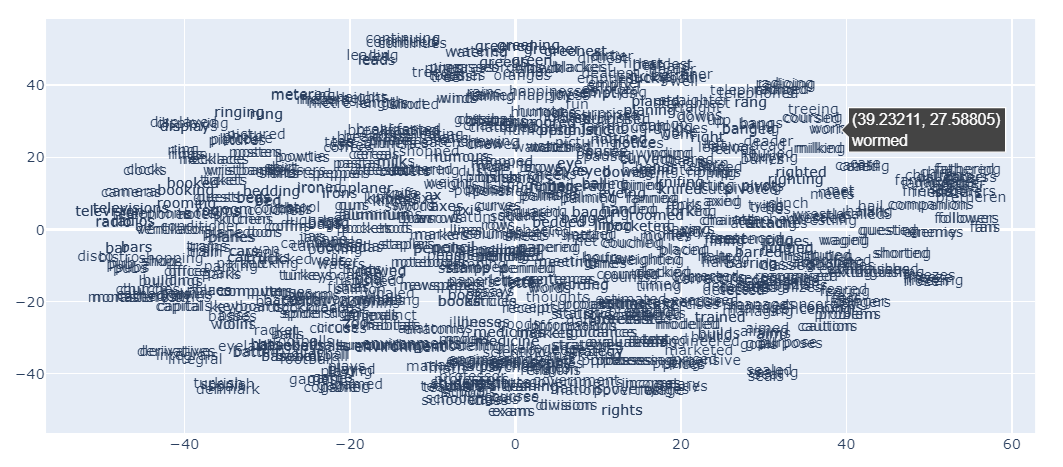

In [103]:
image2 = Image(filename='image2.png')
display(image2)

> After normalization, we can see that, graph is more uniform distributed and not condensed in the center.

In [25]:
lexi[0:4]

[['train', 'trains', 'trained', 'training'],
 ['car', 'cars'],
 ['plane', 'planes', 'planed', 'planing', 'planer'],
 ['exercise', 'exercises', 'exercised', 'exercising']]

In [26]:
x_vals, y_vals, labels = reduce_dimensions_norm(lexi[0:4])

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

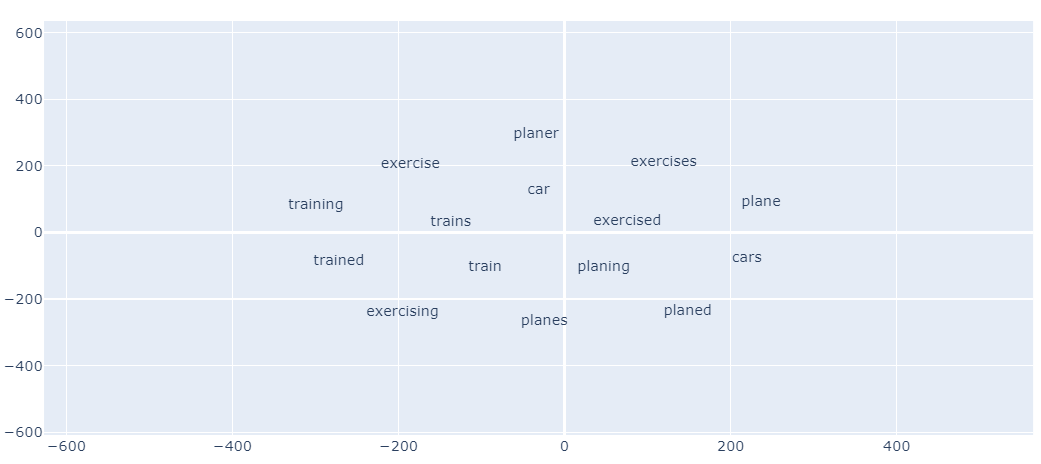

In [104]:
image3 = Image(filename='image3.png')
display(image3)

> Train and trains are closer to plane and cars however trained and training are more closer to exercise and exercising. (After limiting our data, it is easier to see.)

> #### FROM now on, we will examine a less complex example such as "brother", "sister", "father", "iron".

In [27]:
x_vals, y_vals, labels = reduce_dimensions_norm(lexi[4:8])

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

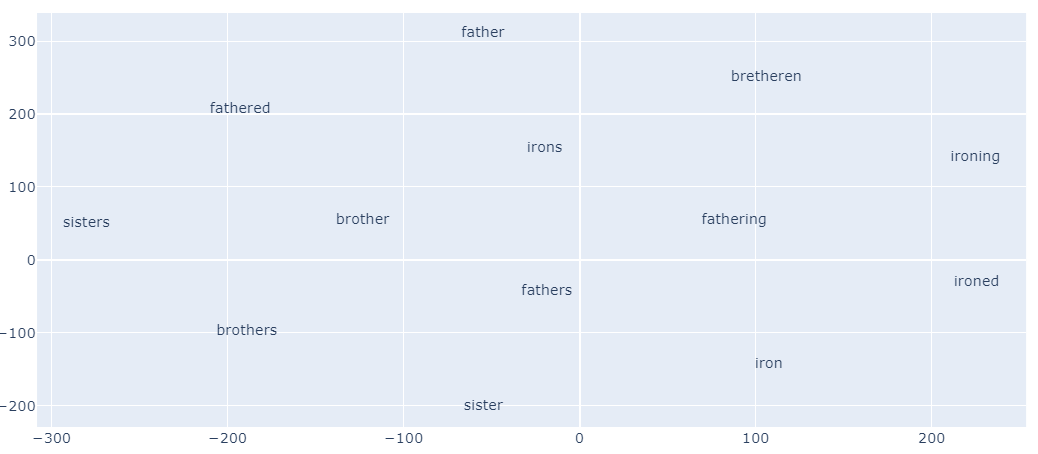

In [105]:
image4 = Image(filename='image4.png')
display(image4)

In [323]:
lexi[4:8]

[['brother', 'brothers', 'bretheren'],
 ['sister', 'sisters'],
 ['father', 'fathers', 'fathered', 'fathering'],
 ['iron', 'irons', 'ironed', 'ironing']]

In [28]:
def reduce_dimensions_norm_mean(lexi):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)
    means_vector = []
    means_label = []
    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for ls in lexi:
        counter = 0
        for word in ls:
            vectors.append(model.wv[word]/np.linalg.norm(model.wv[word]))
            labels.append(word)
            index = 0
            temp = []
            while(index<len(ls)):
                temp.append(model.wv[word]/np.linalg.norm(model.wv[word]))
                if counter < 1:
                    means_label.append("{words}_mean".format(words = word))
                counter += 1
                index += 1
            mean = np.mean(temp, axis=0)
        means_vector.append(mean)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    means_vector = np.asarray(means_vector)
    means_label = np.asarray(means_label)
    

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)
    
    # reduce using t-SNE for the means
    means_vector = np.asarray(means_vector)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    means_vector = tsne.fit_transform(means_vector)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    
    means_x_vals = [v[0] for v in means_vector]
    means_y_vals = [v[1] for v in means_vector]
    
    
    return x_vals, y_vals, labels, means_x_vals, means_y_vals, means_label

> At the above function, mean value are calculated and then t-Distributed Stochastic Neighbor Embedding (which reduces dimensionality) applied.

In [29]:
x_vals, y_vals, labels, means_x_vals, means_y_vals, means_label = reduce_dimensions_norm_mean(lexi[4:8])

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)


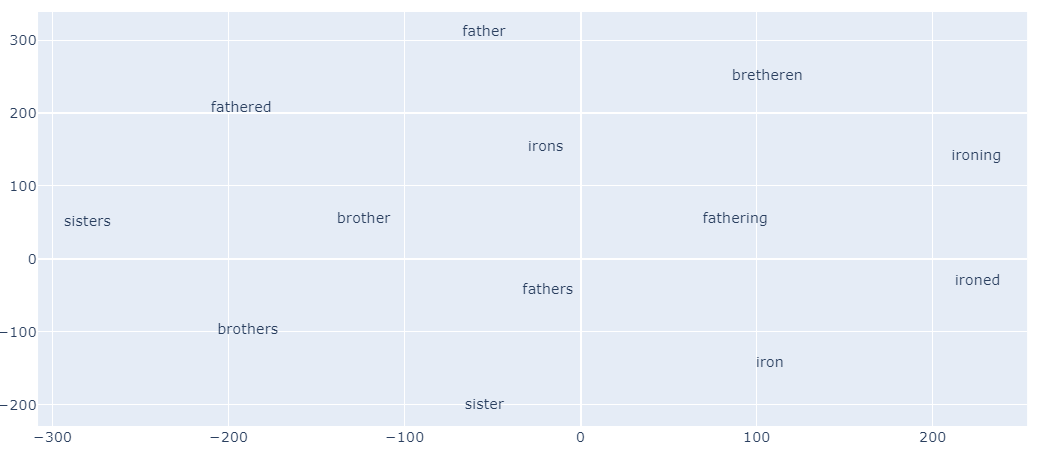

In [106]:
image5 = Image(filename='image5.png')
display(image5)

In [30]:
x_vals, y_vals, labels, means_x_vals, means_y_vals, means_label = reduce_dimensions_norm_mean(lexi[4:8])

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(means_x_vals, means_y_vals, means_label)


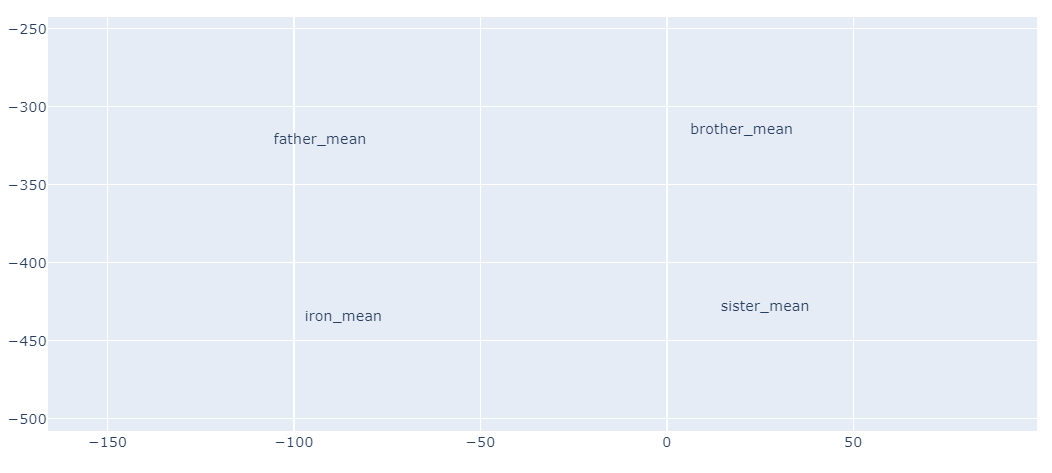

In [107]:
image6 = Image(filename='image6.png')
display(image6)

In [31]:
xs = x_vals+means_x_vals
ys = y_vals+means_y_vals
lms = np.concatenate([labels,means_label])

In [32]:
try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(xs, ys, lms)

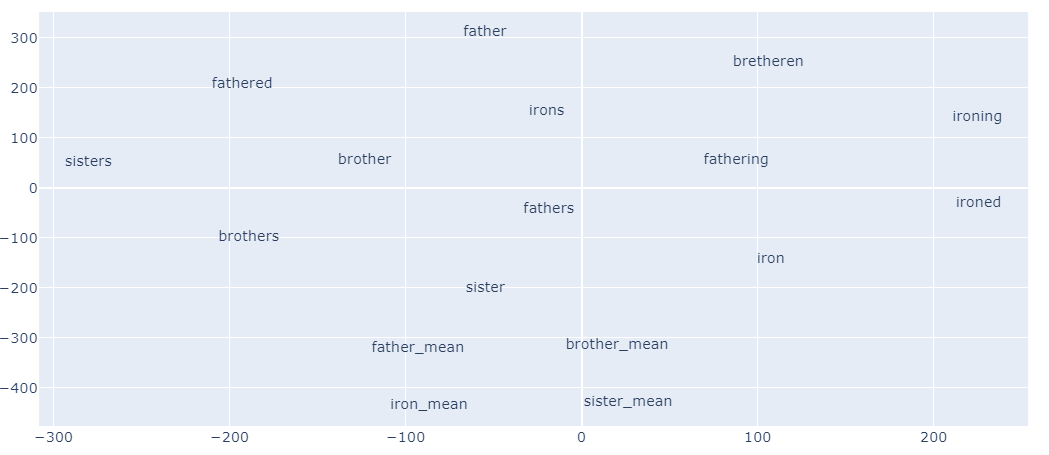

In [108]:
image7 = Image(filename='image7.png')
display(image7)

In [ ]:
"""
import itertools
vectors = [] # positions in vector space
labels = [] # keep track of words to label our data again later
means = []

for key, value in dict(itertools.islice(lexi_dic.items(), 4)).items():
    print(key, value)
    for word in value:
        vectors.append(model.wv[word]/np.linalg.norm(model.wv[word]))
        labels.append(word)"""

In [36]:
mx = np.concatenate([means_x_vals, means_y_vals]).reshape(2,4).T
mx

array([[  20.10395 , -315.44504 ],
       [  26.388409, -428.54404 ],
       [ -92.99527 , -321.72568 ],
       [ -86.710785, -434.82477 ]], dtype=float32)

In [37]:
from scipy.spatial import distance

dist = distance.cosine(mx[0], mx[1])
dist

2.205371856689453e-06

In [42]:
vector_dic = {}
row = 0
while(row < len(mx)):
    for i in list(means_label):
        if i not in vector_dic.keys():
            vector_dic[i] = list(mx[row])
        else:
            pass
        row += 1

In [43]:
vector_dic

{'brother_mean': [20.10395, -315.44504],
 'sister_mean': [26.388409, -428.54404],
 'father_mean': [-92.99527, -321.72568],
 'iron_mean': [-86.710785, -434.82477]}

In [64]:
import itertools
comb_list = list(map(dict, itertools.combinations(vector_dic.items(), 2)))
comb_list

[{'brother_mean': [20.10395, -315.44504],
  'sister_mean': [26.388409, -428.54404]},
 {'brother_mean': [20.10395, -315.44504],
  'father_mean': [-92.99527, -321.72568]},
 {'brother_mean': [20.10395, -315.44504],
  'iron_mean': [-86.710785, -434.82477]},
 {'sister_mean': [26.388409, -428.54404],
  'father_mean': [-92.99527, -321.72568]},
 {'sister_mean': [26.388409, -428.54404],
  'iron_mean': [-86.710785, -434.82477]},
 {'father_mean': [-92.99527, -321.72568],
  'iron_mean': [-86.710785, -434.82477]}]

In [97]:
max_comb = "None"
max_value = float(0)
for dicts in comb_list:
    index = 0
    while(index < len(dicts)-1):
        print("Comparison of {i} and {j}:".format(i=list(dicts.keys())[index], j=list(dicts.keys())[index+1]))
        print("{k:.5f}".format(k=distance.cosine(list(dicts.values())[index], list(dicts.values())[index+1])))
        if distance.cosine(list(dicts.values())[index], list(dicts.values())[index+1]) > max_value:
            max_value = distance.cosine(list(dicts.values())[index], list(dicts.values())[index+1])
            max_comb = "Comparison of {i} and {j}:".format(i=list(dicts.keys())[index], j=list(dicts.keys())[index+1])
        index += 1
print('Greatest distance is: ',max_comb, max_value)

Comparison of brother_mean and sister_mean:
0.00000
Comparison of brother_mean and father_mean:
0.05893
Comparison of brother_mean and iron_mean:
0.03373
Comparison of sister_mean and father_mean:
0.05821
Comparison of sister_mean and iron_mean:
0.03318
Comparison of father_mean and iron_mean:
0.00357
Greatest distance is:  Comparison of brother_mean and father_mean: 0.05893409252166748
